### Importing libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
%matplotlib inline

### Loading data

In [42]:
!unzip "/content/drive/MyDrive/Colab Notebooks/MNIST_data.zip"
!ls

In [43]:
data = pd.read_csv('train.csv')
X_test = pd.read_csv("test.csv")

In [44]:
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Extracting feature variables and target variable

In [45]:
data_y = data['label'].values
data_x = data.drop('label',axis=1)

In [46]:
data_x.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data visualization

First image says the data 1

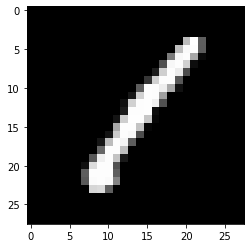

In [47]:
img = data_x.iloc[0].values.reshape((28,28))
plt.imshow(img,cmap='gray')

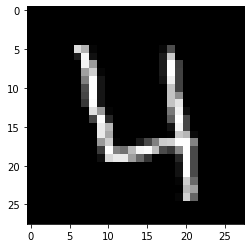

In [48]:
img = data_x.iloc[3].values.reshape((28,28))
plt.imshow(img,cmap='gray')

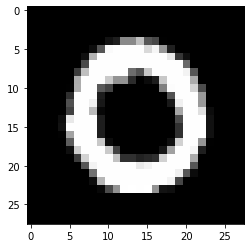

In [49]:
img = data_x.iloc[1].values.reshape((28,28))
plt.imshow(img,cmap='gray')

All the unique numbers can be found by using set

In [50]:
set(data_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

So, all the hand written images from 0 to 9 are represented

In [51]:
X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size = 0.1, random_state=42)

### Model Building

The last layer is 
keras.layers.Dense(10, activation=tf.nn.softmax) because, we have to identify 0 TO 9 numbers, this is classification problem

In [52]:
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(784,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)])

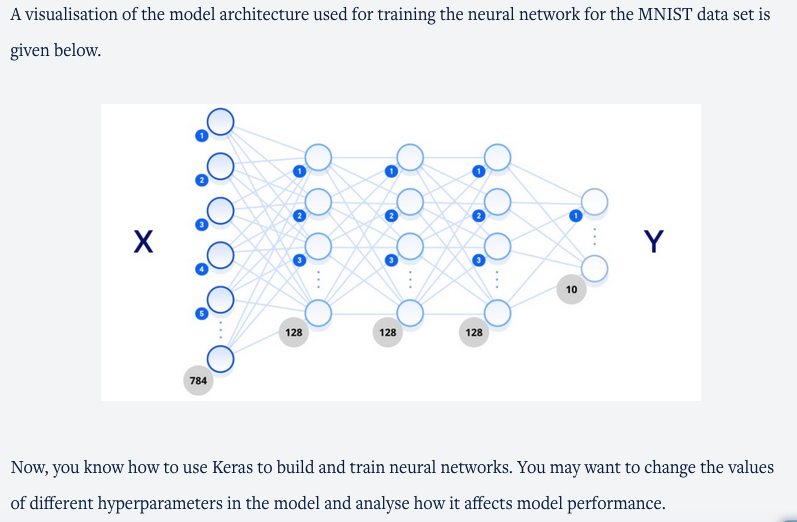

In [53]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 10)               

### Model training

In [54]:
model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
591/591 [==============================] - 3s 4ms/step - loss: 0.5383 - accuracy: 0.8652 - val_loss: 0.2778 - val_accuracy: 0.9202
Epoch 2/5
591/591 [==============================] - 2s 3ms/step - loss: 0.1938 - accuracy: 0.9435 - val_loss: 0.1862 - val_accuracy: 0.9438
Epoch 3/5
591/591 [==============================] - 2s 3ms/step - loss: 0.1457 - accuracy: 0.9574 - val_loss: 0.1513 - val_accuracy: 0.9576
Epoch 4/5
591/591 [==============================] - 2s 3ms/step - loss: 0.1181 - accuracy: 0.9642 - val_loss: 0.1760 - val_accuracy: 0.9507
Epoch 5/5
591/591 [==============================] - 2s 3ms/step - loss: 0.1007 - accuracy: 0.9706 - val_loss: 0.1733 - val_accuracy: 0.9512


### Model evaluation

In [55]:
model.predict(X_test).argmax(axis=1)

array([2, 0, 9, ..., 3, 9, 2])

The predicted label is: 2


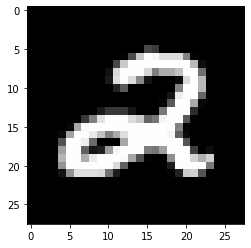

In [56]:
index=-1
img = X_test.iloc[index].values.reshape((28,28))
plt.imshow(img,cmap='gray')
print("The predicted label is:" ,model.predict(X_test).argmax(axis=1)[index])

Further ahead: You can try increasing the model layers and play with the hyperparameters to increase model's performance